In [1]:
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
torch.__version__

'1.9.1'

# Data

In [3]:
# y = mx+c
m = 0.69
c = 0.96
X = torch.arange(0,1,0.002).to(device)
y = torch.tensor(m*X+c).to(device)

/tmp/ipykernel_970021/3981596623.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(m*X+c).to(device)


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# Building Model

In [16]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.m = nn.Parameter(torch.randn(1))
        self.c = nn.Parameter(torch.randn(1))
    
    def forward(self,X):
        return X*self.m+self.c

In [7]:
model_0 = LinearRegressionModel().to(device)
criterion = nn.L1Loss()
optimizer = optim.Adam(model_0.parameters(),lr=0.01)

In [8]:
epochs = 100

In [9]:
m_iter = []
c_iter = []
train_loss_iter = []
test_loss_iter = []

# Training

In [10]:
for epoch in range(epochs):
    # train
    model_0.train()    
    y_preds = model_0(X_train)
    loss = criterion(y_preds,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # test
    model_0.eval()
    with torch.inference_mode():
        y_test_preds = model_0(X_test)
        test_loss = criterion(y_test_preds,y_test)
    paramters = dict(model_0.state_dict())
    m_iter.append(paramters['m'].cpu())
    c_iter.append(paramters['c'].cpu())
    train_loss_iter.append(loss.cpu().detach().numpy())
    test_loss_iter.append(test_loss.cpu().detach().numpy())

In [11]:
model_0.state_dict()

OrderedDict([('m', tensor([0.6908], device='cuda:0')),
             ('c', tensor([0.9606], device='cuda:0'))])

# Predictions / Plotting

/media/indika/Sync/anaconda3/lib/python3.8/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/media/indika/Sync/anaconda3/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


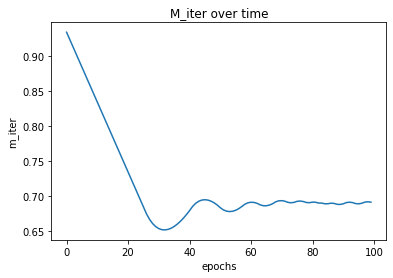

In [12]:
plt.plot(range(epochs),m_iter)
plt.xlabel('epochs')
plt.ylabel('m_iter')
plt.title("M_iter over time")
plt.show()

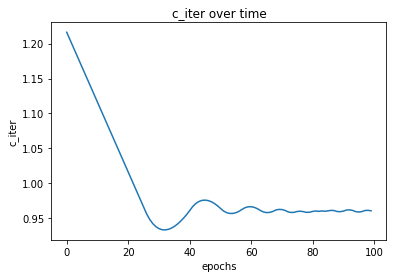

In [13]:
plt.plot(range(epochs),c_iter)
plt.xlabel('epochs')
plt.ylabel('c_iter')
plt.title("c_iter over time")
plt.show()

No handles with labels found to put in legend.


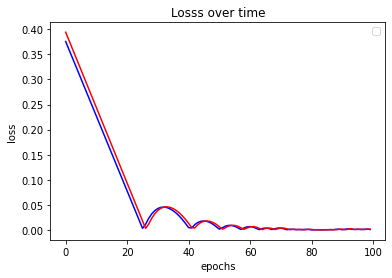

In [14]:
plt.plot(range(epochs),test_loss_iter,'b')
plt.plot(range(epochs),train_loss_iter,'r')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Losss over time")
plt.legend()
plt.show()

In [15]:
y_preds[5:7],y_train[5:7]

(tensor([1.2006, 1.4205], device='cuda:0', grad_fn=<SliceBackward>),
 tensor([1.1987, 1.4182], device='cuda:0'))

# Loading / Saving

In [19]:
state_dict = model_0.state_dict()

In [20]:
torch.save(state_dict,'./models/01/redo_model_00.pth')

In [21]:
model_01 = LinearRegressionModel()

In [23]:
model_01.load_state_dict(torch.load('./models/01/redo_model_00.pth'))

<All keys matched successfully>